# Summary and Dataset

## Description of the Experiment

The experiments were carried out with a group of 30 volunteers, aged between 19 and 48 years. Each participant performed six different activities:

1. **WALKING**
2. **WALKING UPSTAIRS**
3. **WALKING DOWNSTAIRS**
4. **SITTING**
5. **STANDING**
6. **LAYING**

Each participant wore a smartphone on their waist, which was equipped with an accelerometer and a gyroscope. Using these sensors, the following data was captured at a constant rate of 50Hz:

- 3-axial linear acceleration (from the accelerometer)
- 3-axial angular velocity (from the gyroscope)

The experiments were also video-recorded to manually label the data. The obtained dataset was then randomly split into two sets:

- **70%** of the data was used to create the **training set**.
- **30%** of the data was used as the **test set**.

## Data Preprocessing

The sensor signals (accelerometer and gyroscope) underwent several preprocessing steps before being used in the analysis:

1. **Noise Filtering**: Noise filters were applied to the raw sensor data to reduce irrelevant information.
2. **Sliding Window Sampling**: The data was sampled in fixed-width sliding windows of **2.56 seconds** with **50% overlap**, resulting in 128 readings per window.
3. **Separation of Body and Gravity Acceleration**: The sensor's total acceleration signal, which includes both gravitational and body motion components, was separated using a **Butterworth low-pass filter** with a **0.3 Hz cutoff frequency**. The gravitational force, which is assumed to only contain low-frequency components, was separated from the body acceleration.

## Features Extraction

For each window of data, a vector of features was extracted by computing variables from both the **time** and **frequency domains**. These features were used to train machine learning models to classify the different activities.

## Dataset Variables

Each record in the dataset includes the following information:

- **Triaxial Acceleration**: The accelerometer readings, representing the total acceleration and the estimated body acceleration.
- **Triaxial Angular Velocity**: The gyroscope readings, representing the angular velocity along the three axes.

This dataset is widely used for **activity recognition** tasks in machine learning, where the goal is to classify the type of activity (walking, sitting, etc.) based on the sensor data.


# Importing Pyhton and ML Libraries

In [72]:
!pip install xgboost

In [3]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

/var/folders/cq/rzjcl9z567z16j2qd6wr45lr0000gn/T/ipykernel_56374/3599219488.py:27: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [4]:
train_df = pd.read_csv("Desktop/train.csv")
test_df = pd.read_csv("Desktop/test.csv")

In [5]:
train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [6]:
test_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

# Data Processing

In [8]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [9]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [10]:
train_df.info()
type(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


pandas.core.frame.DataFrame

In [11]:
train_df.shape

(7352, 563)

In [12]:
train_df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [13]:
test_df.info()
type(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


pandas.core.frame.DataFrame

In [14]:
test_df.shape

(2947, 563)

In [15]:
test_df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [17]:
train_df.duplicated().sum()

0

In [18]:
test_df.duplicated().sum()

0

# Data Visualizing

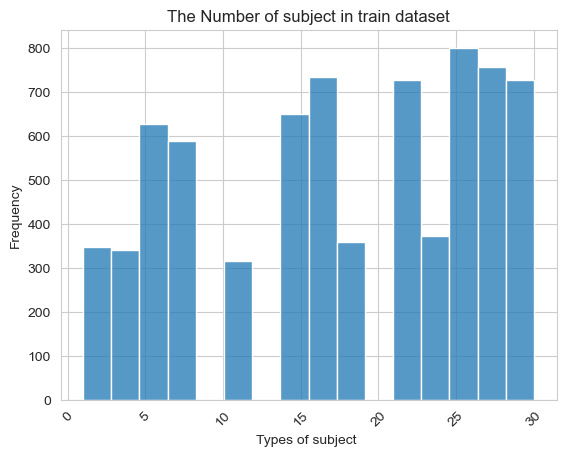

In [83]:
sns.histplot(train_df['subject'])
plt.xlabel("Types of subject ")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("The Number of subject in train dataset")
plt.show()

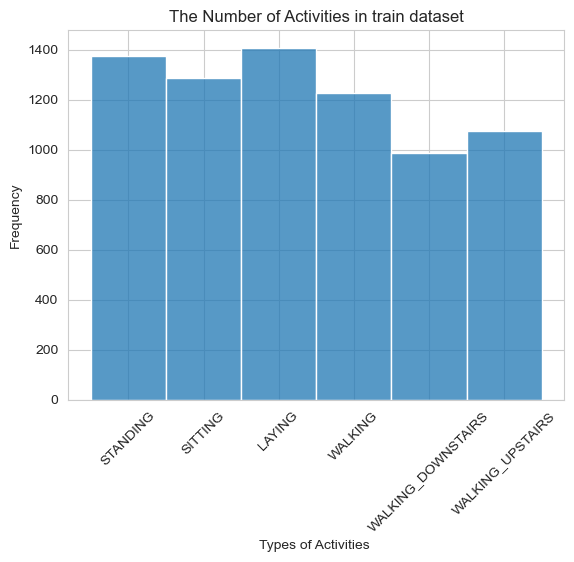

In [85]:
sns.histplot(train_df['Activity'])
plt.xlabel("Types of Activities ")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("The Number of Activities in train dataset")
plt.show()

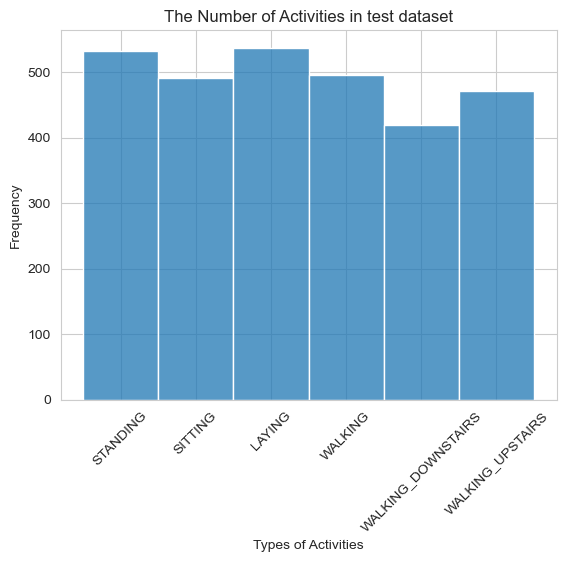

In [84]:
sns.histplot(test_df['Activity'])
plt.xlabel("Types of Activities")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("The Number of Activities in test dataset")
plt.show()


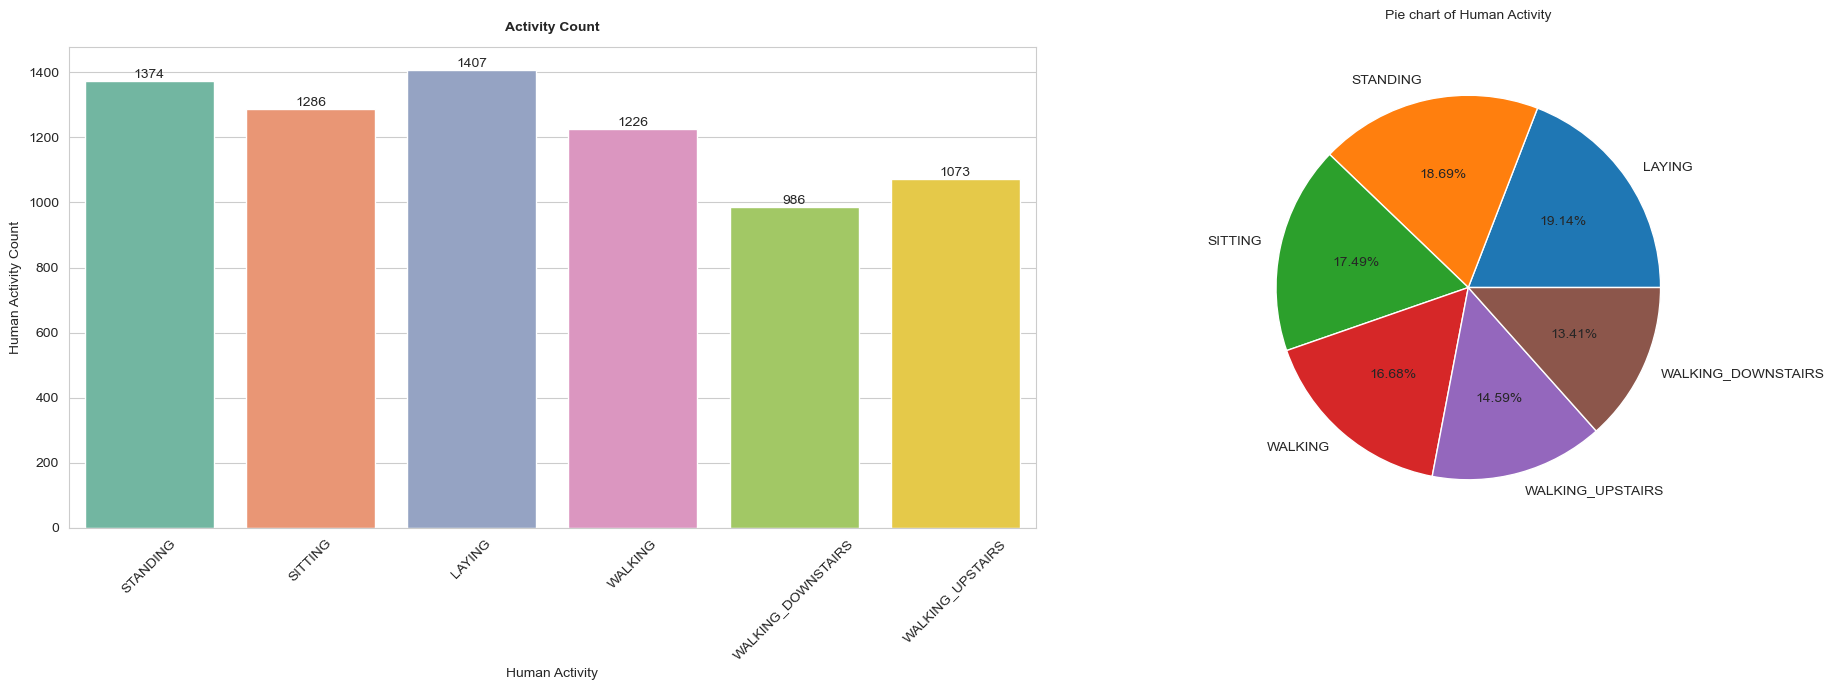

In [86]:
plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=train_df, x='Activity', palette='Set2')
plt.title("Activity Count", pad=12, fontsize=10, fontweight='bold')
plt.xlabel('Human Activity')
plt.ylabel('Human Activity Count')
plt.xticks(rotation=45)
ax1.bar_label(ax1.containers[0])

plt.subplot(1, 2, 2)
acivity_count_labels = train_df['Activity'].value_counts()
plt.pie(acivity_count_labels,
        autopct="%.2f%%",
        labels = acivity_count_labels.index
)
plt.title("Pie chart of Human Activity", pad=20, fontsize=10, fontweight=20)

plt.tight_layout()
plt.show()

# Categorization of Activities: Static vs Dynamic

## Static and Dynamic Activities

Based on the common nature of the activities, we can broadly categorize them into two groups:

### 1. Static Activities:
These activities involve little to no movement, and can be considered as **static**:
- **SITTING**
- **STANDING**
- **LAYING**

### 2. Dynamic Activities:
These activities involve significant motion and are categorized as **dynamic**:
- **WALKING**
- **WALKING DOWNSTAIRS**
- **WALKING UPSTAIRS**

## Using the tBodyAccMag-mean() Feature for Classification

One way to differentiate between static and dynamic activities is by using the **tBodyAccMag-mean()** feature, which represents the mean of the total body acceleration magnitude. This feature is particularly useful because it captures the overall intensity of movement, which is typically higher for dynamic activities compared to static ones.

### Probability Density Function (PDF) for Variable Analysis

If we aim to build a simple classification model to classify the activity using one variable at a time, the **Probability Density Function (PDF)** of the feature can be an insightful tool. It helps assess the importance and distribution of continuous variables.

By analyzing the PDF of the **tBodyAccMag-mean()** feature, we can visually determine how well this variable separates the static and dynamic activities. If the distributions of the feature for static and dynamic activities are distinct, this will indicate that the variable is a good discriminator for classifying the activities.

### Conclusion

In summary, by leveraging the **tBodyAccMag-mean()** feature and analyzing its PDF, we can get a clearer understanding of how to differentiate between static and dynamic activities, and it could be used as a key input to a classification model.


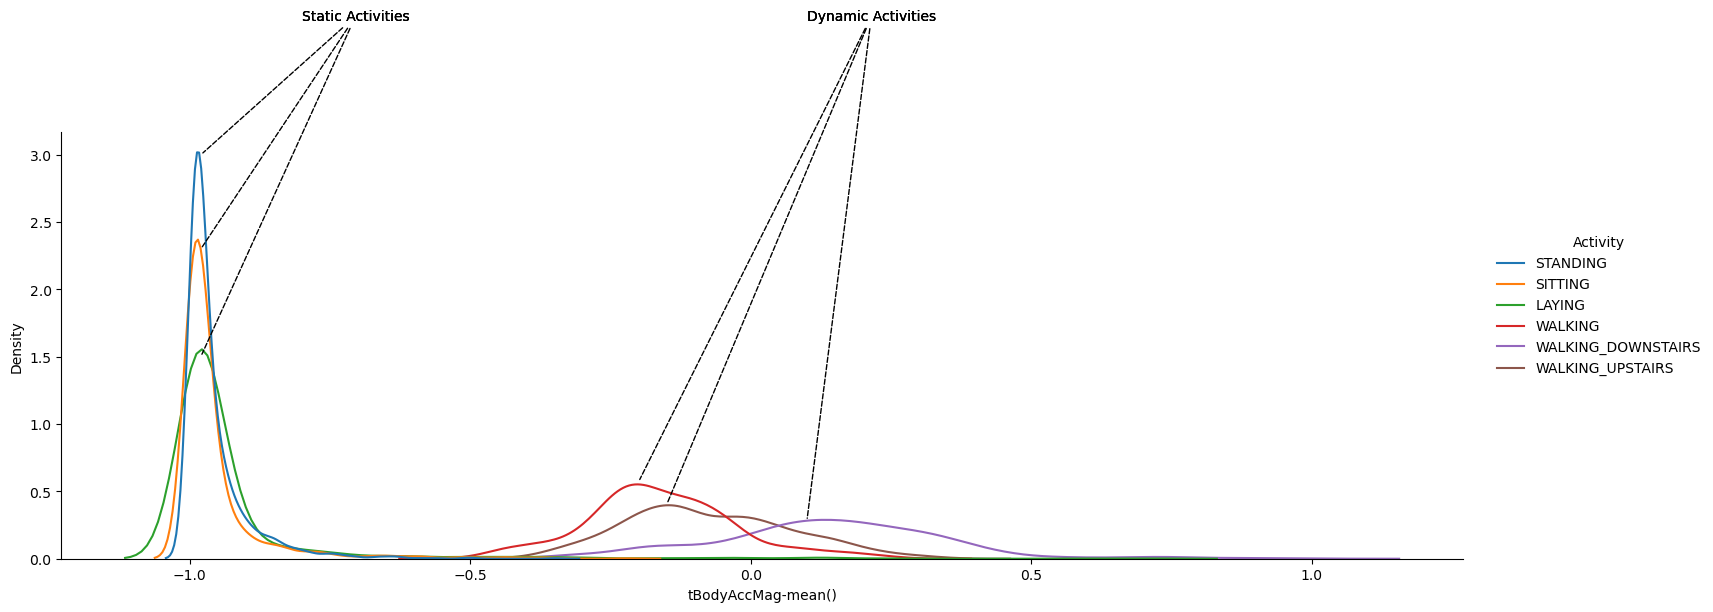

In [7]:
import warnings
warnings.filterwarnings('ignore')
sns.displot(train_df, x='tBodyAccMag-mean()', hue='Activity', kind='kde', height=5, aspect=3)

plt.annotate("Static Activities", xy = (-.98, 1.5), xytext = (-.8, 4), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 2.3), xytext = (-.8, 4), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 3), xytext = (-.8, 4), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,0.57), xytext=(0.1, 4),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,0.28), xytext=(0.1, 4),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.15,0.4), xytext=(0.1, 4),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

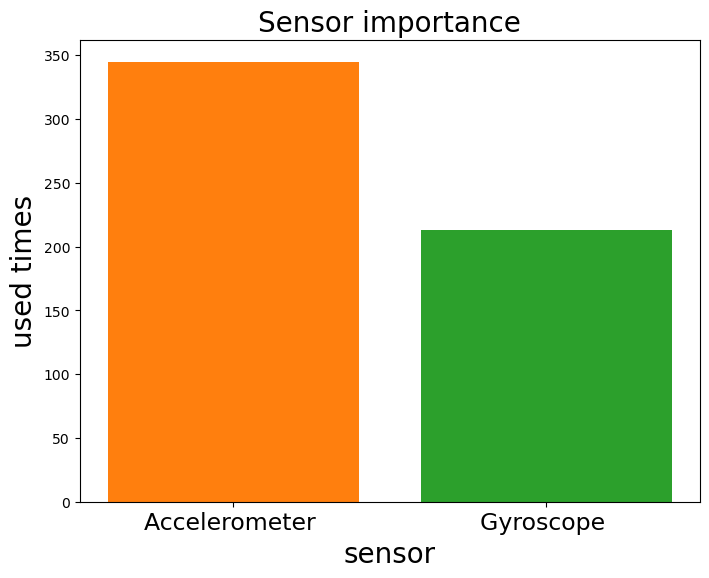

In [24]:
Acc=0
Gyro=0
other=0 
for i in train_df.columns:
    if'Acc'in i:
        Acc += 1
    elif'Gyro'in i:
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(8, 6))
plt.bar(x = ['Accelerometer ','Gyroscope '], height = [Acc,Gyro], color=['tab:orange', 'tab:green'])
plt.title("Sensor importance", fontsize = 20)
plt.xlabel("sensor", size=20)
plt.ylabel("used times", size=20)
plt.xticks(fontsize=17)
plt.show()

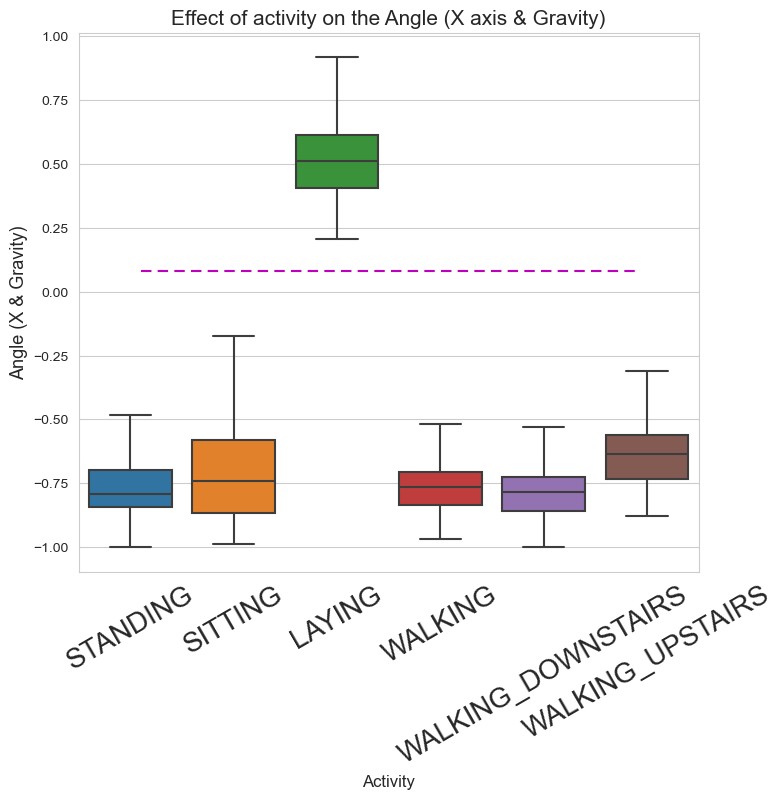

In [34]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_df, showfliers=False)
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=15)
plt.xlabel("Activity", size=12)
plt.ylabel('Angle (X & Gravity)', size=13)
plt.xticks(rotation=30,fontsize=20)
plt.show()

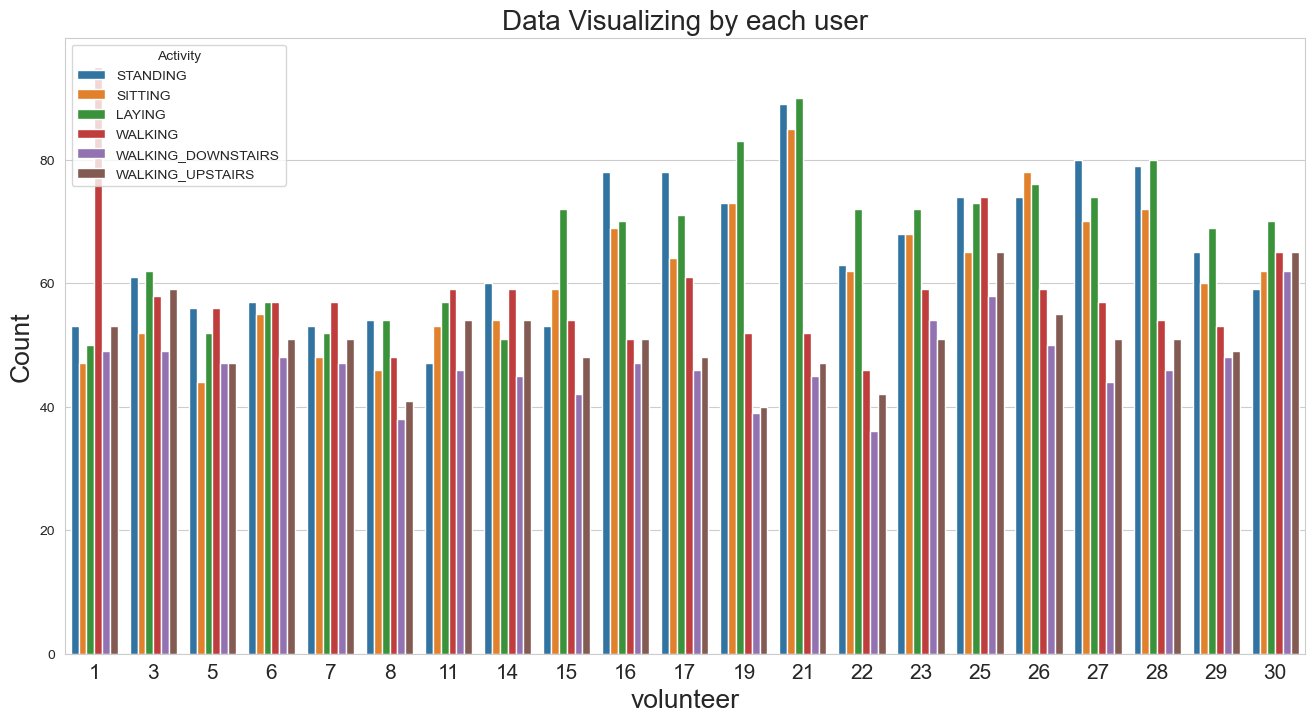

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.color_palette("tab10")
plt.title('Data Visualizing by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity',data=train_df)
plt.xlabel("volunteer", size=19)
plt.ylabel("Count", size=19)
plt.xticks(size=15)
plt.show()

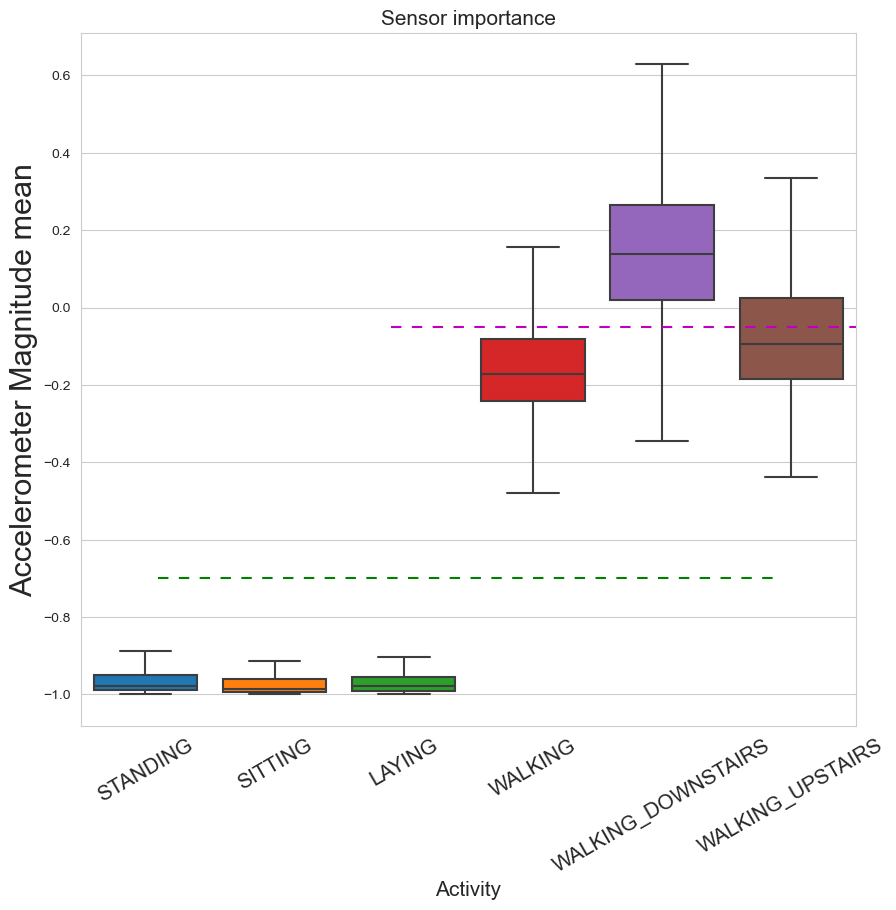

In [38]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_df, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 15)
plt.xlabel("Activity", size=15)
plt.ylabel('Accelerometer Magnitude mean', size=22)
plt.xticks(rotation=30, fontsize=15)
plt.show()

# Visualizing High-Dimensional Data with t-SNE

The following Python function `perform_tsne()` leverages the t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm to reduce high-dimensional feature data (`X_data`) into two dimensions for visualization purposes. It also visualizes the clustering of different activity classes (`y_data`).

### Function Purpose:
- To explore how data points (e.g., motion sensor features) cluster based on their activity labels.
- To visualize separability among classes using 2D plots with varying perplexity values.

### Key Parameters:
- `X_data`: Feature matrix to be reduced (high-dimensional).
- `y_data`: Labels corresponding to `X_data`.
- `perplexities`: List of perplexity values to try with t-SNE, impacting the neighborhood size.
- `n_iter`: Number of iterations for optimization (default: 1000).
- `img_name_prefix`: Prefix for saved plot image filenames.

### Process Overview:
1. For each `perplexity` value:
   - Apply t-SNE to reduce `X_data` to 2D.
   - Create a DataFrame combining reduced dimensions and labels.
   - Use seaborn to create a 2D scatter plot, coloring points by class label.
   - Save the resulting plot as an image in the current working directory.
   - Display the plot.

This function is essential for **understanding the structure and distribution** of the dataset in a lower-dimensional space, especially before training classification models.



In [8]:
columns = train_df.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_df.columns = columns
test_df.columns = columns

In [9]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, \
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 0.486s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.056s
[t-SNE] Iteration 50: error = 89.3036957, gradient norm = 0.0295030 (50 iterations in 1.473s)
[t-SNE] Iteration 100: error = 82.9692535, gradient norm = 0.0077753 (50 iterations in 0.842s)
[t-SNE] Iteration 150: error = 81.5970459, gradient norm = 0

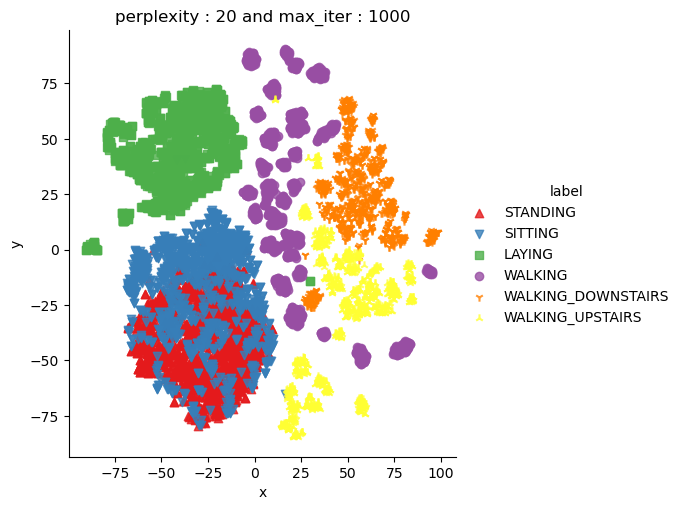

Done


In [11]:
X_pre_tsne=train_df.drop(['subject','Activity'],axis=1)
y_pre_tsne=train_df['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20])

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data preprocessing and exploratory data analysis. It transforms high-dimensional data into a lower-dimensional space while retaining most of the variance (information) in the original dataset.

### Purpose of PCA:
- To reduce the number of input variables (features) while preserving as much information as possible.
- To visualize high-dimensional data in 2D or 3D.
- To speed up machine learning algorithms by reducing computational complexity.
- To remove multicollinearity (correlated features).

### Key Concepts:
- **Principal Components**: New features constructed as linear combinations of the original features. They are orthogonal (uncorrelated) and ranked by the amount of variance they capture.
- **Explained Variance**: The amount of variance captured by each principal component. The first component captures the most variance.

### PCA Workflow:
1. Standardize the data (mean = 0, standard deviation = 1).
2. Compute the covariance matrix of the features.
3. Calculate eigenvalues and eigenvectors of the covariance matrix.
4. Select top `k` eigenvectors (principal components) that capture most of the variance.
5. Project the original data onto these principal components to obtain the reduced dataset.


In [12]:
data=pd.concat([train_df,test_df])
data=train_df.sample(frac=1)
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']

X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']

pca=PCA(n_components=0.99)
pca.fit(X)
x_reduced=pca.transform(X)


print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=8598)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=8598)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=8598)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=8598)

Frequency components number is 296 Time components number is 265
Original number of features 561 Reduced number of features 155


In [14]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

## Evaluating a Feedforward Neural Network (FNN)

In this section, we define and evaluate a basic Feedforward Neural Network using the Keras library.

### 1. Data Preparation
The dataset is split into input features (`x_train`, `x_test`) and target labels (`y_train`, `y_test`). We assume the last column in the dataset contains the target class labels, and all previous columns are features.



In [15]:
x_train, y_train = train_df.iloc[:, :-2], train_df.iloc[:, -1:]
x_test, y_test = test_df.iloc[:, :-2], test_df.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [16]:
x_test, y_test = test_df.iloc[:, :-2], test_df.iloc[:, -1:]
x_test.shape, y_test.shape

((2947, 561), (2947, 1))

In [17]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

## Defining a Feedforward Neural Network Model

The following code defines a simple feedforward neural network using the Keras `Sequential` API.

```python
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [18]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        35,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,358 (142.02 KB)

 Trainable params: 36,358 (142.02 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs= 20,validation_data = (x_test,y_test))

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4303 - loss: 1.4536 - val_accuracy: 0.8124 - val_loss: 0.8841
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.7976 - loss: 0.7751 - val_accuracy: 0.8527 - val_loss: 0.5403
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8707 - loss: 0.4823 - val_accuracy: 0.8819 - val_loss: 0.3854
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8997 - loss: 0.3468 - val_accuracy: 0.9206 - val_loss: 0.3053
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9266 - loss: 0.2633 - val_accuracy: 0.9233 - val_loss: 0.2658
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9269 - loss: 0.2280 - val_accuracy: 0.9199 - val_loss: 0.2255
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9448 - loss: 0.1803 - val_accuracy: 0.9403 - val_loss: 0.1886
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.9488 - loss: 0.1619 - val_

In [20]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(
            Dropout(0.2))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()

Reloading Tuner from project/Human_activity_recognition/tuner0.json
Search space summary
Default search space size: 23
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
initializer (Choice)
{'default': 'uniform', 'conditions': [], 'values': ['uniform', 'normal'], 'ordered': False}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 

In [21]:
tuner.search(x_train, y_train,
             epochs= 10,
             validation_data=(x_test, y_test))

In [22]:
tuner.results_summary()

Results summary
Results in project/Human_activity_recognition
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 2
units0: 480
initializer: normal
activation: tanh
units1: 96
units2: 224
units3: 384
units4: 128
units5: 32
units6: 192
units7: 32
Score: 0.949892540772756

Trial 2 summary
Hyperparameters:
num_layers: 2
units0: 64
initializer: normal
activation: relu
units1: 64
units2: 96
units3: 96
units4: 160
units5: 256
units6: 96
units7: 512
Score: 0.9330392479896545

Trial 0 summary
Hyperparameters:
num_layers: 8
units0: 128
initializer: normal
activation: relu
units1: 256
units2: 32
units3: 32
units4: 32
units5: 32
units6: 32
units7: 32
Score: 0.7380386789639791

Trial 3 summary
Hyperparameters:
num_layers: 20
units0: 512
initializer: normal
activation: tanh
units1: 96
units2: 288
units3: 224
units4: 416
units5: 128
units6: 64
units7: 448
units8: 32
units9: 32
units10: 32
units11: 32
units12: 32
units13: 32
units14: 32

In [23]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=51, validation_data=(x_test,y_test))

Epoch 1/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7837 - loss: 0.6543 - val_accuracy: 0.9169 - val_loss: 0.8047
Epoch 2/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.7052 - val_accuracy: 0.9433 - val_loss: 0.4213
Epoch 3/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7785 - loss: 0.6030 - val_accuracy: 0.9450 - val_loss: 0.5524
Epoch 4/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7848 - loss: 0.6490 - val_accuracy: 0.9437 - val_loss: 0.5166
Epoch 5/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.6318 - val_accuracy: 0.9080 - val_loss: 1.1392
Epoch 6/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 0.6973 - val_accuracy: 0.9403 - val_loss: 0.6245
Epoch 7/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.6454 - val_accuracy: 0.8877 - val_loss: 1.3704
Epoch 8/51
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.6028 - val_accuracy: 0.

In [24]:
model.summary()
import tensorflow as tf

from tensorflow import keras

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fitt = model.fit(x_train,y_train, epochs=200, validation_data=(x_test,y_test), callbacks=Callback)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 480)            │       269,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        46,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           582 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 949,556 (3.62 MB)

 Trainable params: 316,518 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 633,038 (2.41 MB)

Epoch 1/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.5565 - val_accuracy: 0.9420 - val_loss: 0.7963
Epoch 2/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.5135 - val_accuracy: 0.9464 - val_loss: 0.5539
Epoch 3/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.5154 - val_accuracy: 0.9433 - val_loss: 0.6778
Epoch 4/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.5500 - val_accuracy: 0.9532 - val_loss: 0.6200
Epoch 5/200
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.5140 - val_accuracy: 0.9433 - val_loss: 0.8027


In [25]:
accuracy = mo_fitt.history['accuracy']
loss = mo_fitt.history['loss']
validation_loss = mo_fitt.history['val_loss']
validation_accuracy = mo_fitt.history['val_accuracy']

## 📊 Training vs Validation Metrics Visualization

The following code plots the model's performance in terms of accuracy and loss during training and validation phases.


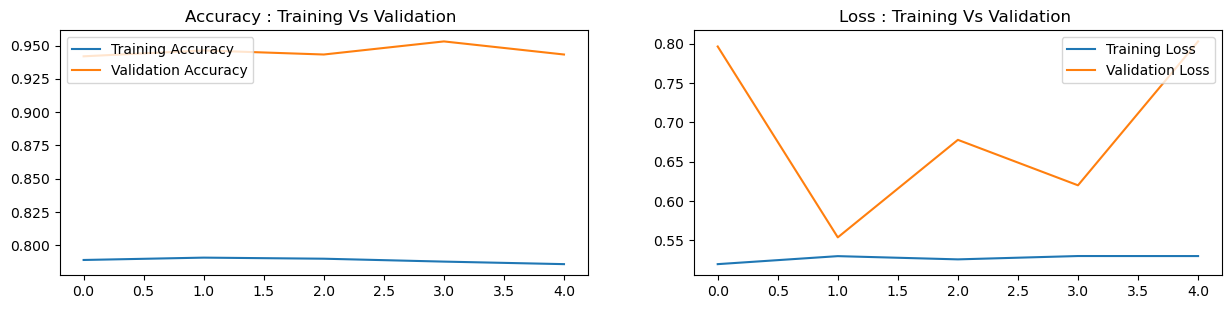

In [26]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

## 🔁 Logistic Regression Model

The following code applies **Logistic Regression** using Scikit-learn to classify the activities based on sensor features. Logistic Regression is a simple yet powerful linear model commonly used for classification problems.

### ✅ Steps:
- Split the data into training and testing sets.
- Fit the Logistic Regression model on the training data.
- Predict on the test data.
- Evaluate the performance using accuracy score and classification report.


Training Accuracy Logistic Regression 99.06147986942328  Test Accuracy Logistic Regression 95.79233118425518
Training Precesion Logistic Regression 99.06147986942328  Test Precesion Logistic Regression 95.79233118425518
Training Recall Logistic Regression 99.06147986942328  Test Recall Logistic Regression 95.79233118425518


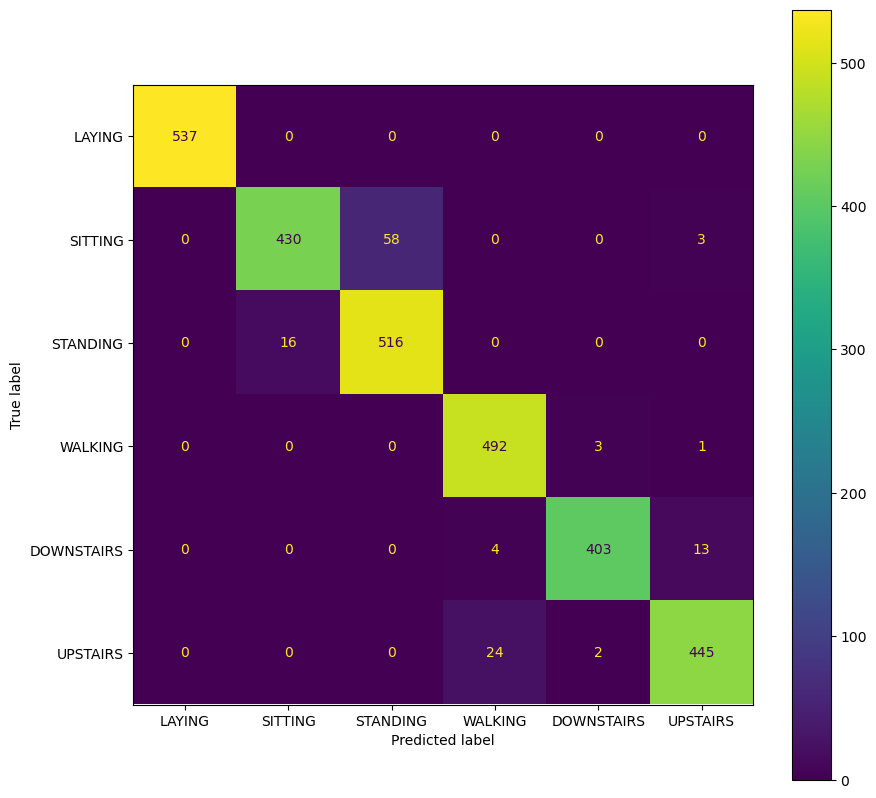

In [27]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

In [55]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = lr.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report for Logistic Regression:")
print(report)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.88      0.92       491
           2       0.90      0.97      0.93       532
           3       0.95      0.99      0.97       496
           4       0.99      0.96      0.97       420
           5       0.96      0.94      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [28]:
SC=StandardScaler()
X_train_Scaled=SC.fit_transform(x_train)
X_test_Scaled=SC.fit_transform(x_test)

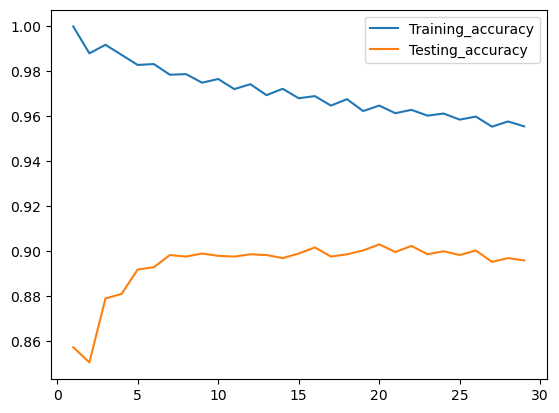

In [29]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracy=[]
test_accuracy=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_Scaled,y_train)
  train_accuracy.append(knn.score(X_train_Scaled,y_train))
  test_accuracy.append(knn.score(X_test_Scaled,y_test))

x=[i for i in range(1,30)]
plt.plot(x,train_accuracy,label='Training_accuracy')
plt.plot(x,test_accuracy,label='Testing_accuracy')
plt.legend()
plt.plot();

## 📍 K-Nearest Neighbors (KNN) Classifier

This code applies the **K-Nearest Neighbors algorithm**, a non-parametric method used for classification. KNN works by finding the majority class among the *k* nearest data points in the feature space.

### ✅ Steps:
- Split the dataset into training and testing sets.
- Initialize and train the KNN classifier with a chosen number of neighbors (k).
- Predict on the test data.
- Evaluate performance using accuracy score, classification report, and confusion matrix.


In [30]:
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_Scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
classifier.score(X_train_Scaled,y_train)
classifier.score(X_test_Scaled,y_test)

0.8788598574821853

Training Accuracy KNeighborsClassifier 95.94668117519043  Test Accuracy KNeighborsClassifier 90.02375296912113
Training Precesion KNeighborsClassifier 95.94668117519043  Test Precesion KNeighborsClassifier 90.02375296912113
Training Recall KNeighborsClassifier 95.94668117519043  Test Recall KNeighborsClassifier 90.02375296912113


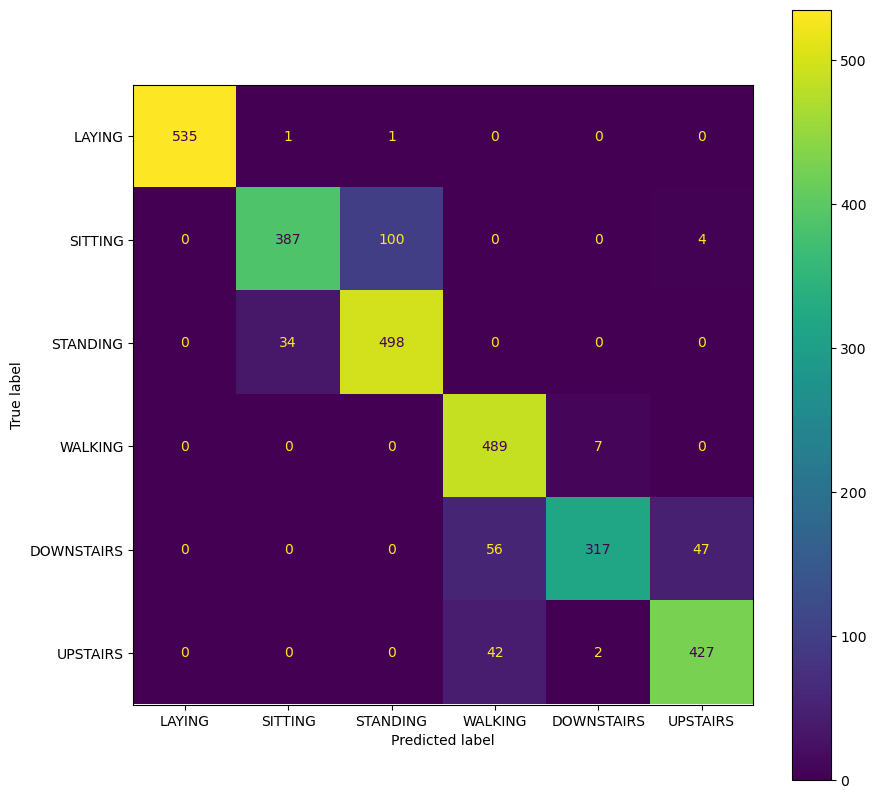

In [32]:
knn = KNeighborsClassifier(n_neighbors=30).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

In [56]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred_knn = knn.predict(x_test)

# Generate classification report
print("Classification Report for KNeighborsClassifier (k=30):")
print(classification_report(y_test, y_pred_knn))


Classification Report for KNeighborsClassifier (k=30):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.79      0.85       491
           2       0.83      0.94      0.88       532
           3       0.83      0.99      0.90       496
           4       0.97      0.75      0.85       420
           5       0.89      0.91      0.90       471

    accuracy                           0.90      2947
   macro avg       0.91      0.89      0.90      2947
weighted avg       0.91      0.90      0.90      2947



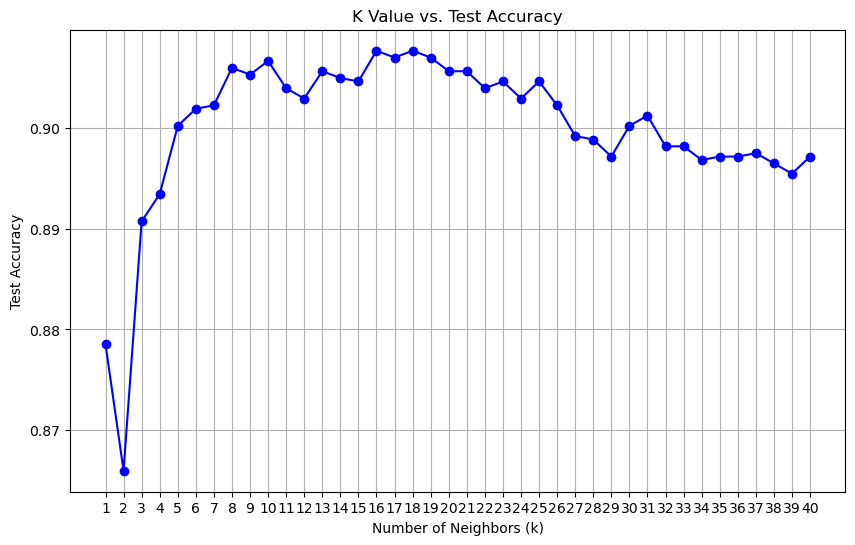

In [57]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 41)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('K Value vs. Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## 🧠 Support Vector Machine (SVM) Classifier

This section applies the **Support Vector Machine** (SVM), a powerful supervised learning algorithm used for classification tasks. SVM attempts to find the optimal hyperplane that separates classes in the feature space.

### ✅ Steps:
- Split the data into training and test sets.
- Train an SVM classifier using the linear or RBF kernel.
- Evaluate performance using accuracy, classification report, and confusion matrix.


Training Accuracy Linear SVC(LBasedImpl) 99.46953210010882  Test Accuracy Linear SVC(LBasedImpl) 96.67458432304038
Training Precesion Linear SVC(LBasedImpl) 99.46953210010882  Test Precesion Linear SVC(LBasedImpl) 96.67458432304038
Training Recall Linear SVC(LBasedImpl) 99.46953210010882  Test Recall Linear SVC(LBasedImpl) 96.67458432304038


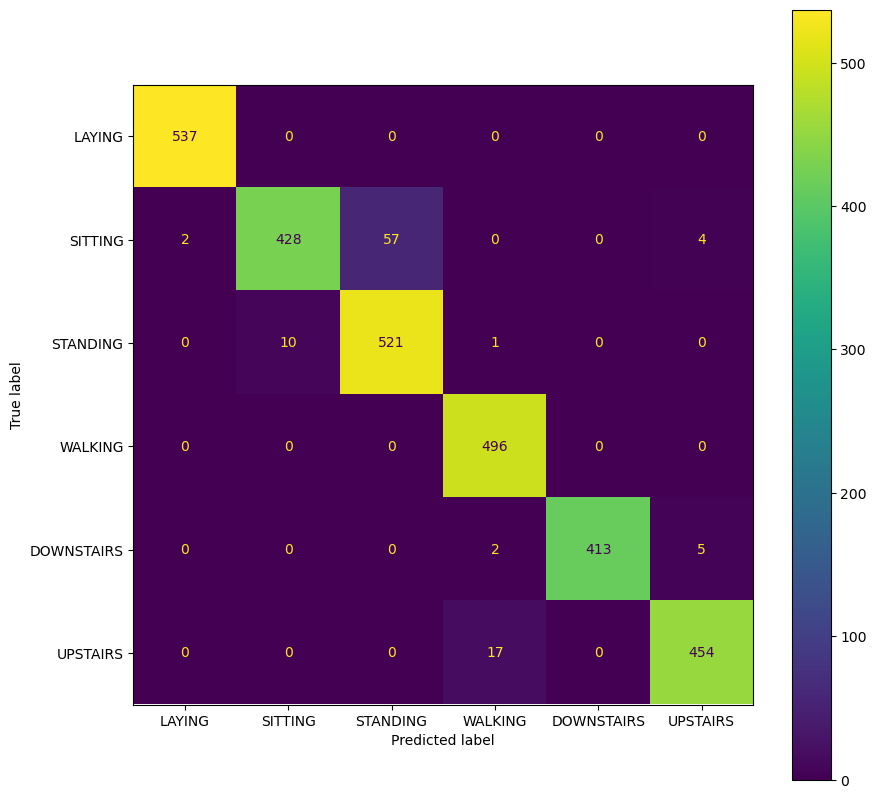

In [33]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

In [58]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred_linsvc = lin_svc.predict(x_test)

# Print the classification report
print("Classification Report for Linear SVC (LBasedImpl):")
print(classification_report(y_test, y_pred_linsvc))


Classification Report for Linear SVC (LBasedImpl):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.87      0.92       491
           2       0.90      0.98      0.94       532
           3       0.96      1.00      0.98       496
           4       1.00      0.98      0.99       420
           5       0.98      0.96      0.97       471

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



Training Accuracy RBF SVC 97.90533188248097  Test Accuracy RBF SVC 95.04580929759076
Training Precesion RBF SVC 97.90533188248097  Test Precesion RBF SVC 95.04580929759076
Training Recall RBF SVC 97.90533188248097  Test Recall RBF SVC 95.04580929759076


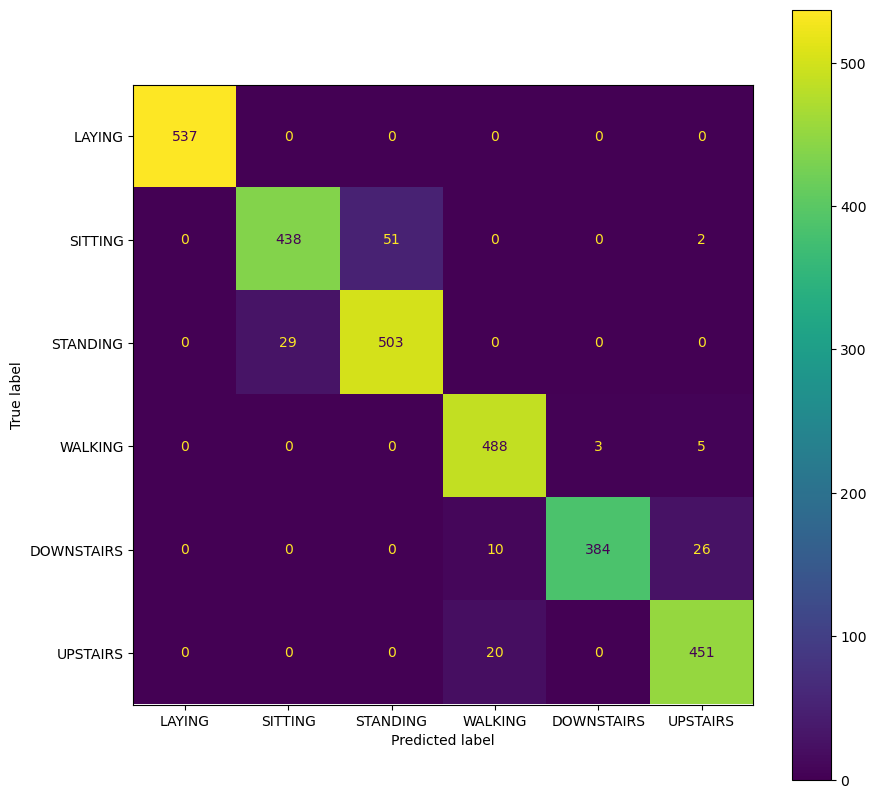

In [34]:
rbf = svm.SVC(kernel='rbf').fit(x_train, y_train)
evaluate_classification(rbf, "RBF SVC", x_train, x_test, y_train, y_test)

In [59]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred_rbf = rbf.predict(x_test)

# Print the classification report
print("Classification Report for RBF SVC:")
print(classification_report(y_test, y_pred_rbf))


Classification Report for RBF SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.89      0.91       491
           2       0.91      0.95      0.93       532
           3       0.94      0.98      0.96       496
           4       0.99      0.91      0.95       420
           5       0.93      0.96      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



## 🌳 Decision Tree Classifier

A **Decision Tree** is a supervised learning algorithm used for classification and regression tasks. It splits the data into subsets based on feature values to build a tree-like model of decisions.

### ✅ Steps:
- Split the data into training and testing sets.
- Train the decision tree classifier.
- Evaluate using accuracy score, classification report, and confusion matrix.


Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 86.15541228367832
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 86.15541228367832
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 86.15541228367832


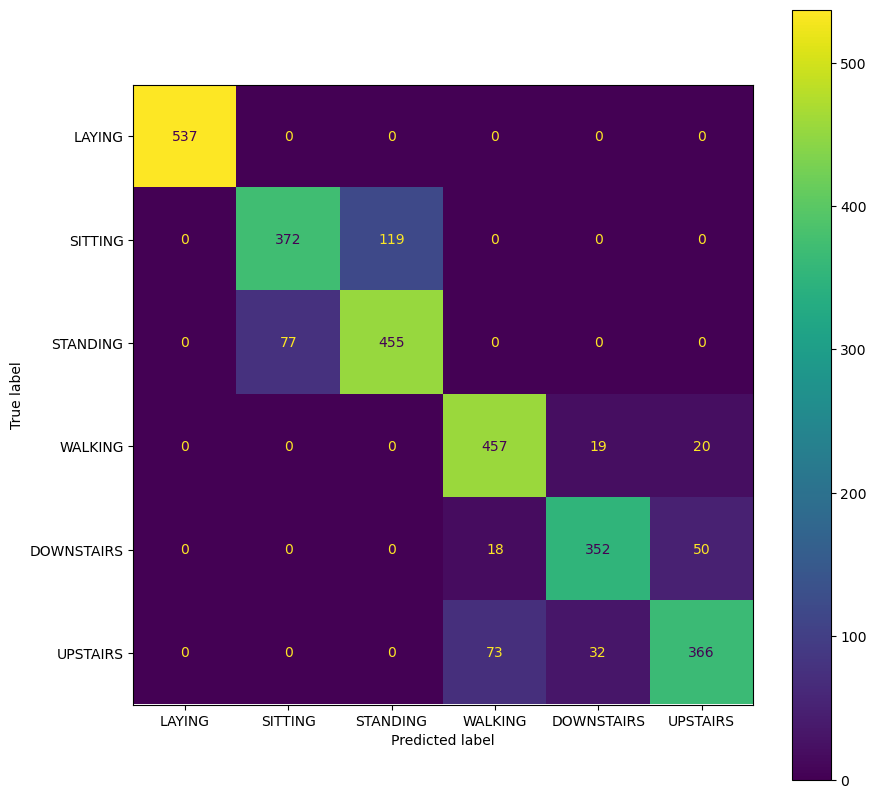

In [35]:
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

In [60]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred_dtc = tdt.predict(x_test)

# Print the classification report
print("Classification Report for DecisionTreeClassifier:")
print(classification_report(y_test, y_pred_dtc))


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.83      0.76      0.79       491
           2       0.79      0.86      0.82       532
           3       0.83      0.92      0.88       496
           4       0.87      0.84      0.86       420
           5       0.84      0.78      0.81       471

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



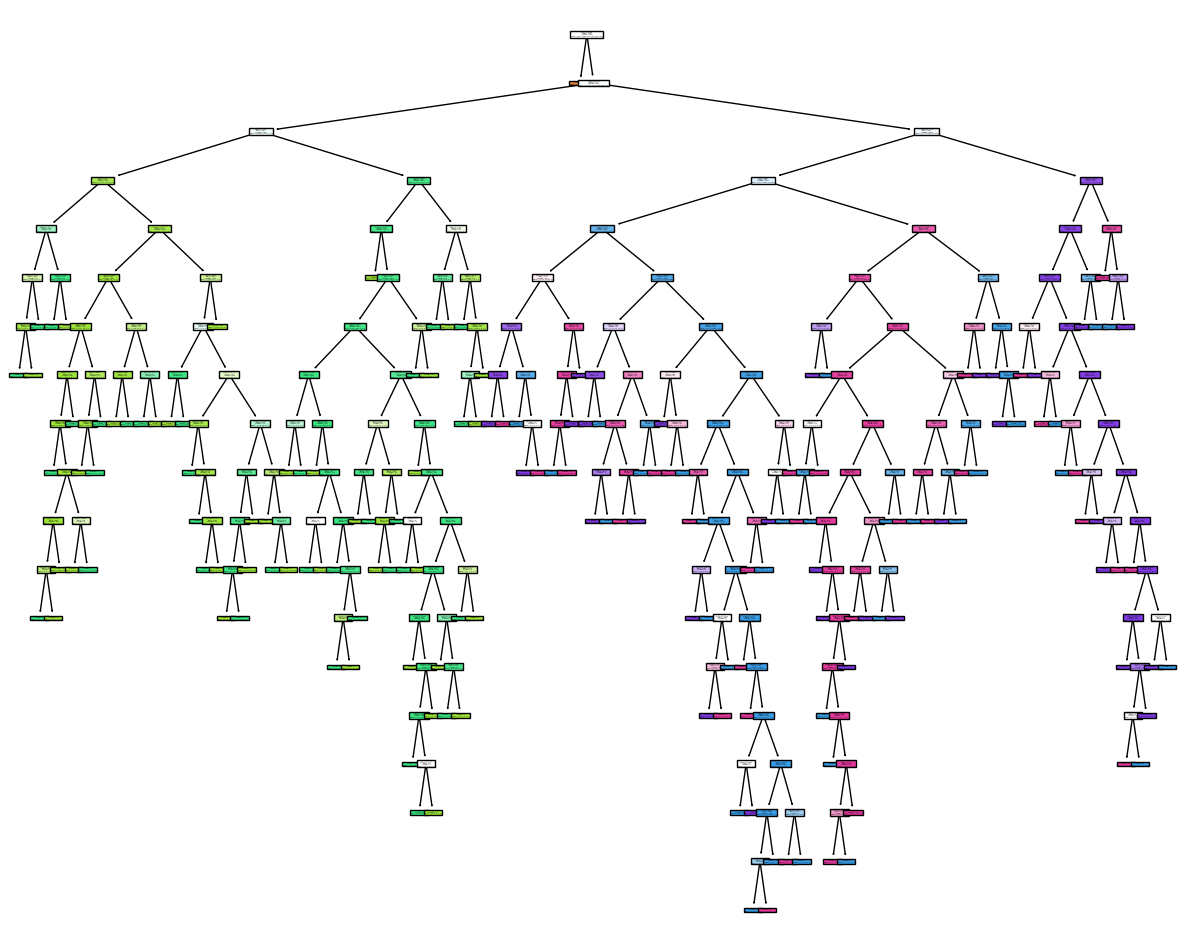

In [36]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(tdt , filled=True)
plt.show()

## 🌲 Random Forest Classifier

A **Random Forest** is an ensemble learning method that operates by constructing multiple decision trees during training and outputs the class that is the majority vote of the trees (for classification). It reduces the overfitting problem of individual decision trees.

### ✅ Steps:
- Split the data into training and testing sets.
- Train the Random Forest classifier.
- Evaluate using accuracy score, classification report, and confusion matrix.


Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 92.50084832032576
Training Precesion RandomForestClassifier 100.0  Test Precesion RandomForestClassifier 92.50084832032576
Training Recall RandomForestClassifier 100.0  Test Recall RandomForestClassifier 92.50084832032576


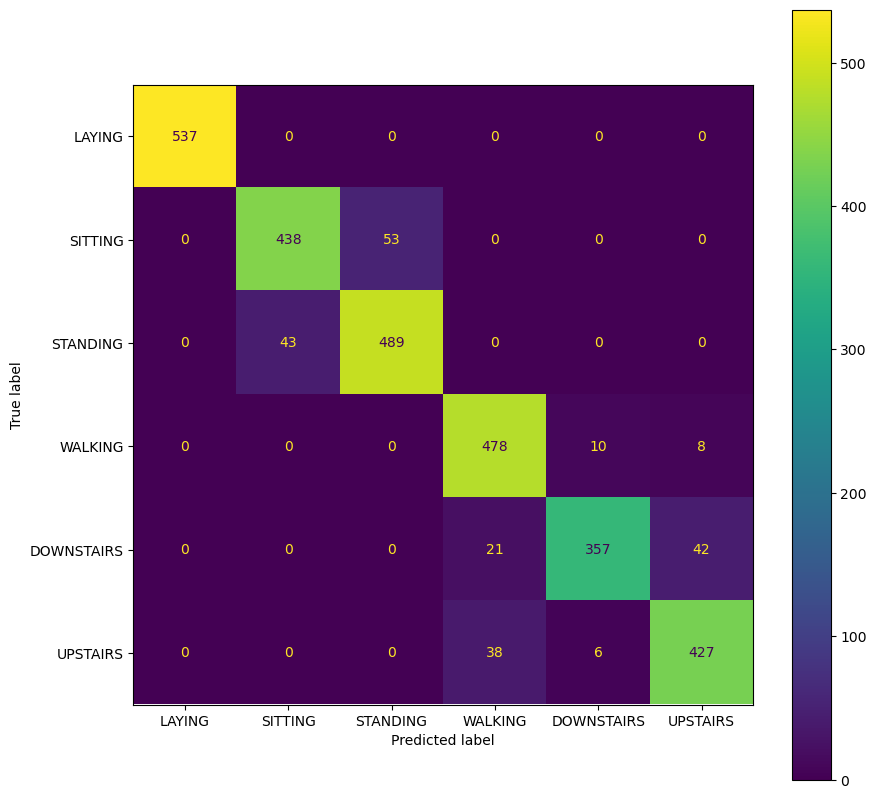

In [37]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

In [61]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred_rf = rf.predict(x_test)

# Print the classification report
print("Classification Report for RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.89      0.90       491
           2       0.90      0.92      0.91       532
           3       0.89      0.96      0.93       496
           4       0.96      0.85      0.90       420
           5       0.90      0.91      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.92      2947



# Visualizing and Comparing Feature Models (Logistic Regression, KNN, SVM, Decision Tree and Rondom Forest)

## 📊 Training and Testing Accuracy Plot

This section will plot the **Training Accuracy** and **Testing Accuracy** to visualize the model's performance during training and testing.

- The plot helps to observe whether the model is overfitting, underfitting, or generalizing well based on the accuracies for both training and testing sets.


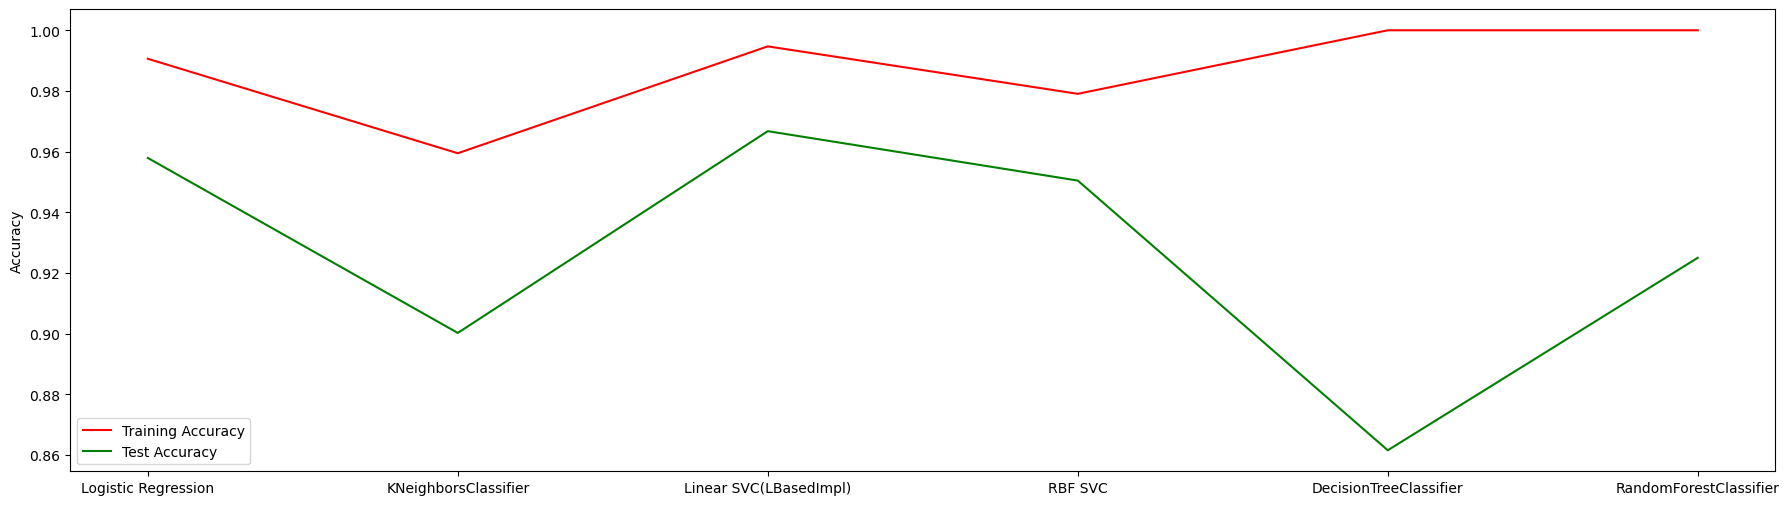

In [38]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)) , [value[0] for value in values], color='red')
ax.plot(np.arange(len(keys)) , [value[1] for value in values], color='g')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

## 📊 Training and Testing Precision Plot

This section will plot the **Training Precision** and **Testing Precision** to visualize the model's precision during training and testing.

- The plot will help to observe how well the model is performing in terms of precision on both the training and testing datasets.
- Precision is a key metric, especially in cases where class imbalance exists, as it gives us the proportion of true positive results over all positive predictions.


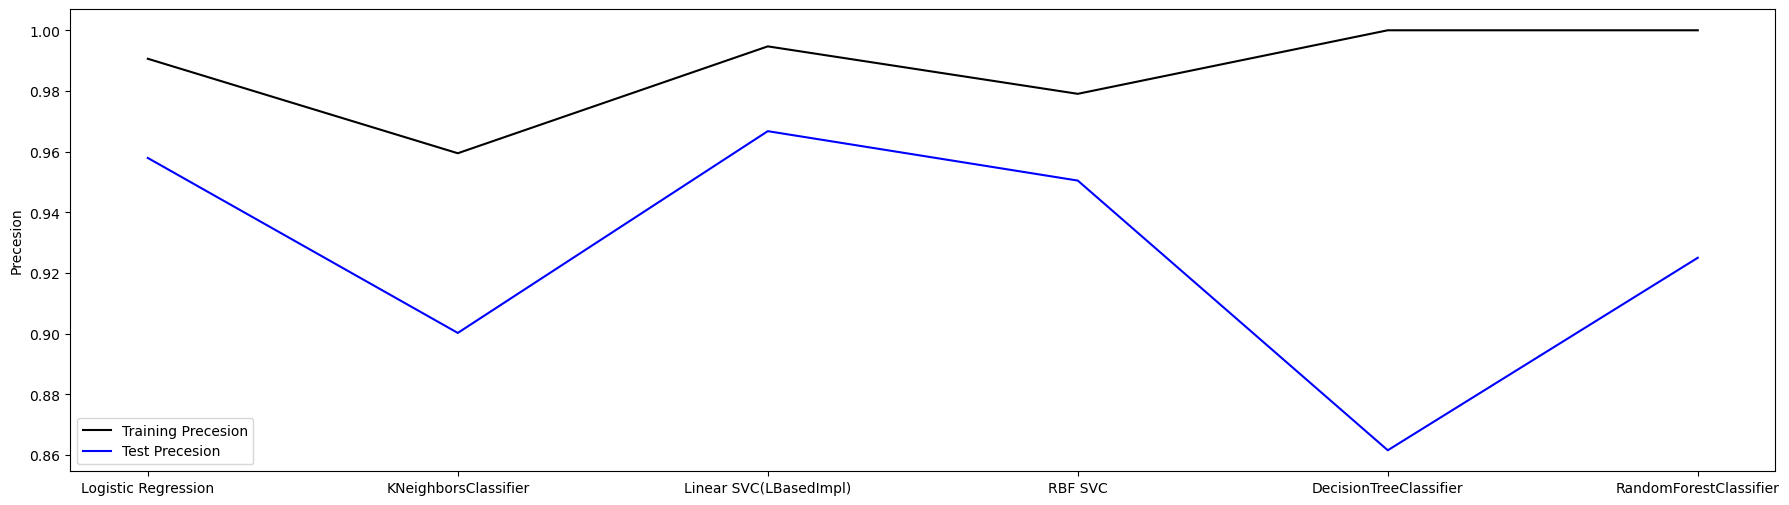

In [39]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[2] for value in values], color='black')
ax.plot(np.arange(len(keys)), [value[3] for value in values], color='b')
ax.legend(["Training Precesion", "Test Precesion"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

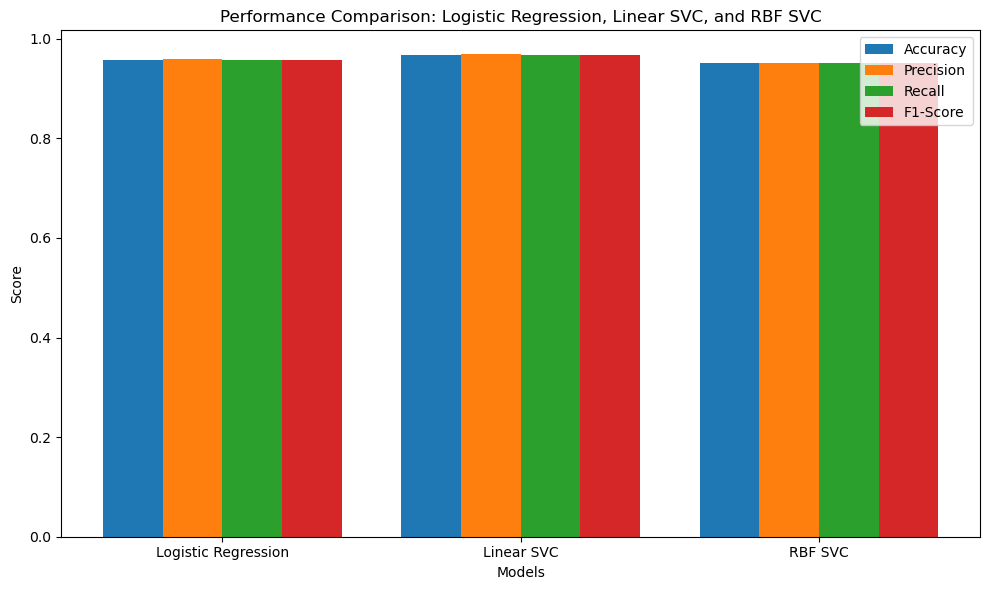

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Linear SVC": svm.LinearSVC(),
    "RBF SVC": svm.SVC(kernel='rbf')
}

# Prepare data to store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Loop over models and calculate metrics
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate classification report metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract metrics for the first class (0-based index)
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(report['accuracy'])
    metrics["Precision"].append(report['weighted avg']['precision'])
    metrics["Recall"].append(report['weighted avg']['recall'])
    metrics["F1-Score"].append(report['weighted avg']['f1-score'])

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Bar width
x = range(len(metrics["Model"]))  # X-axis positions for each model

ax.bar(x, metrics["Accuracy"], width=width, label="Accuracy", align="center")
ax.bar([p + width for p in x], metrics["Precision"], width=width, label="Precision", align="center")
ax.bar([p + width*2 for p in x], metrics["Recall"], width=width, label="Recall", align="center")
ax.bar([p + width*3 for p in x], metrics["F1-Score"], width=width, label="F1-Score", align="center")

# Formatting the plot
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Performance Comparison: Logistic Regression, Linear SVC, and RBF SVC")
ax.set_xticks([p + width*1.5 for p in x])  # Set x-ticks to center
ax.set_xticklabels(metrics["Model"])
ax.legend()

plt.tight_layout()
plt.show()


# Model is saved

In [40]:
import joblib


joblib.dump(lr, 'log_reg_model.pkl')


joblib.dump(lin_svc, 'svc_model.pkl')

print("Models saved successfully!")


Models saved successfully!


In [41]:
log_reg_loaded = joblib.load('log_reg_model.pkl')
svc_model_loaded = joblib.load('svc_model.pkl')

print("Models loaded successfully!")


Models loaded successfully!


In [42]:
import joblib

log_reg = joblib.load('log_reg_model.pkl')
svc_model = joblib.load('svc_model.pkl')


In [43]:
log_reg

LogisticRegression()

In [44]:
svc_model

LinearSVC()

In [45]:
print(log_reg.coef_)    
print(log_reg.intercept_)


[[-0.16837217 -0.01066548  0.05776235 ...  1.48959724 -0.65165023
  -0.1673234 ]
 [-0.10289873  0.00861003 -0.07061256 ... -0.44962332 -1.17215715
  -0.25982763]
 [ 0.04746438  0.00515963  0.05761799 ... -0.51583286  1.4543995
   0.22320344]
 [ 0.01366328 -0.03186439  0.00573076 ... -0.36829503  0.00905521
   0.11553529]
 [ 0.27664625  0.0950557   0.1210709  ... -0.4592873  -0.17815551
  -0.10999691]
 [-0.06650301 -0.06629549 -0.17156945 ...  0.30344127  0.5385082
   0.19840921]]
[-0.02546928 -0.12309383 -0.16049991  0.13247094  0.11919347  0.05739861]


# Future Prediction

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = log_reg.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9579233118425518
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.88      0.92       491
           2       0.90      0.97      0.93       532
           3       0.95      0.99      0.97       496
           4       0.99      0.96      0.97       420
           5       0.96      0.94      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix:
 [[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict using the Support Vector Classifier
y_pred_svc = svc_model.predict(x_test)

# Accuracy
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

# Classification report
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

# Confusion matrix
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


SVC Accuracy: 0.9667458432304038
SVC Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.87      0.92       491
           2       0.90      0.98      0.94       532
           3       0.96      1.00      0.98       496
           4       1.00      0.98      0.99       420
           5       0.98      0.96      0.97       471

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947

SVC Confusion Matrix:
 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


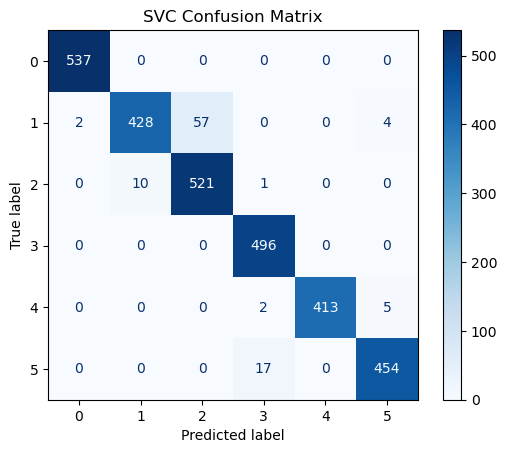

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(svc_model, x_test, y_test, cmap='Blues')
plt.title("SVC Confusion Matrix")
plt.show()


# Best Models

### Logistic Regression

#### • Simple and Fast:
Logistic Regression is computationally efficient and works well for binary and multi-class classification problems.

#### • Interpretable:
The model provides interpretable coefficients, which can be useful for understanding the relationship between features and predicted classes.

#### • Good for Linearly Separable Data:
It performs well when the decision boundaries between classes are linear.

---

### Performance Insights

- If the data is mostly linearly separable (or approximately so), logistic regression might perform well with a fast-training time.


### Linear SVC (Support Vector Classifier with Linear Kernel)

#### • Efficient for Linearly Separable Data:
Linear SVC works well when the data is linearly separable or nearly so.

#### • Good Generalization:
By maximizing the margin between classes, SVC tends to generalize well even in high-dimensional spaces.

#### • Effective for High Dimensionality:
Linear SVC can handle many features well, making it suitable for complex datasets.

---

### Performance Insights

- Linear SVC is a great choice if the data has a linear structure or if you have a lot of features that are not inherently highly non-linear.


### RBF SVC (Support Vector Classifier with Radial Basis Function Kernel)

#### • Handles Non-Linear Boundaries:
The RBF kernel can map data into higher-dimensional spaces, making it effective for handling non-linear relationships between features.

#### • Good Performance in Complex Datasets:
RBF SVC often performs better when the data is complex and not linearly separable.

#### • Flexible Kernel:
The RBF kernel is highly flexible and can model complex decision boundaries.

---

### Performance Insights

- RBF SVC is suitable when your data shows non-linear patterns and requires a more powerful model to separate the classes effectively.
